In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# 1. 加載數據
# 假設您的數據存儲在 'dietary_records.csv' 文件中
df = pd.read_csv('diet_data_cleaned.csv')

# 2. 查看數據結構
print(df.head())

# 3. 處理缺失值
# 將缺失值填補為 0，表示未消耗該食物a
df_filled = df.fillna(0)

# 4. 分離特徵與標籤
# 假設 'ID' 是唯一標識，且不作為特徵
# 如果有其他標籤（例如類別標籤），請根據需要調整
X = df_filled.drop('ID', axis=1)

# 5. 數據標準化
# 對數據進行標準化，使每個特徵具有零均值和單位方差
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Scaled shape: {X_scaled.shape}")

        ID  Stewed  Prune  Dried  Mixed  Apple  Banana  Berry  Cherry  \
0  1000054     0.0    0.0    0.0    0.0    0.0     1.0    0.5     0.0   
1  1000142     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0   
2  1000208     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0   
3  1000259     0.0    0.0    0.0    0.0    1.0     1.0    0.0     0.0   
4  1000267     0.0    0.0    0.0    0.0    1.0     1.0    0.0     0.0   

   Grapefruit  ...  Pea  Sweetpepper  Spinach  Sprouts  Sweetcorn  \
0         0.0  ...  0.0          0.0      0.0      0.0        0.0   
1         0.0  ...  0.0          0.0      0.0      0.0        0.0   
2         0.0  ...  0.0          0.0      0.0      0.0        0.0   
3         0.0  ...  0.0          0.0      0.0      0.0        0.0   
4         0.0  ...  0.0          0.0      0.0      0.0        0.0   

   Freshtomato  Tinnedtomato  Turnip_swede  Watercress  Othervegetables  
0          0.0           0.0           0.0         0.0              0.0 

In [3]:
# 設定最大主成分數量
max_components = 53
svd = TruncatedSVD(n_components=max_components, random_state=42)

# 擬合模型並計算累積解釋變異量
svd.fit(X_scaled)
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# 找到達到 90% 累積解釋變異量的主成分數量
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Optimal number of components: {optimal_components}")

# 使用最佳主成分數量重新初始化 SVD
svd = TruncatedSVD(n_components=optimal_components, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

# 查看每個主成分的解釋變異量
explained_variance_ratio = svd.explained_variance_ratio_

# 列印每個主成分的解釋變異量
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {variance:.4f} ({variance*100:.2f}%)")

# 累積解釋變異量
cumulative_variance_ratio = np.sum(explained_variance_ratio)
print(f"Cumulative Explained Variance Ratio: {cumulative_variance_ratio}")

Optimal number of components: 46
Component 1: 0.0639 (6.39%)
Component 2: 0.0393 (3.93%)
Component 3: 0.0299 (2.99%)
Component 4: 0.0261 (2.61%)
Component 5: 0.0244 (2.44%)
Component 6: 0.0224 (2.24%)
Component 7: 0.0222 (2.22%)
Component 8: 0.0214 (2.14%)
Component 9: 0.0208 (2.08%)
Component 10: 0.0204 (2.04%)
Component 11: 0.0202 (2.02%)
Component 12: 0.0198 (1.98%)
Component 13: 0.0194 (1.94%)
Component 14: 0.0192 (1.92%)
Component 15: 0.0190 (1.90%)
Component 16: 0.0189 (1.89%)
Component 17: 0.0186 (1.86%)
Component 18: 0.0185 (1.85%)
Component 19: 0.0183 (1.83%)
Component 20: 0.0182 (1.82%)
Component 21: 0.0181 (1.81%)
Component 22: 0.0180 (1.80%)
Component 23: 0.0178 (1.78%)
Component 24: 0.0177 (1.77%)
Component 25: 0.0176 (1.76%)
Component 26: 0.0175 (1.75%)
Component 27: 0.0175 (1.75%)
Component 28: 0.0173 (1.73%)
Component 29: 0.0172 (1.72%)
Component 30: 0.0171 (1.71%)
Component 31: 0.0171 (1.71%)
Component 32: 0.0169 (1.69%)
Component 33: 0.0168 (1.68%)
Component 34: 0.016

In [19]:
components = svd.components_
for i in range(5):  # 查看前 5 個主成分
    print(f"Component {i+1}:")
    print(f"Top features: {np.argsort(np.abs(components[i]))[::-1][:5]}")  # 前 5 大權重變量


Component 1:
Top features: [39 48 41 44 36]
Component 2:
Top features: [32 29 33 42 31]
Component 3:
Top features: [49 37 41 40 35]
Component 4:
Top features: [ 9  5  6 11  2]
Component 5:
Top features: [ 4  5  6  7 15]


In [21]:
import pandas as pd
import numpy as np

# 確認是否有列名
try:
    feature_names = X.columns  # 如果 X 是 DataFrame，取得列名
except AttributeError:
    feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]  # 若 X 是 NumPy 陣列，生成列名

# 將主成分矩陣轉為 DataFrame
components_df = pd.DataFrame(svd.components_, columns=feature_names)
print("Top rows of components dataframe:")
print(components_df.head())  # 查看前 5 個主成分的特徵權重

# 查看每個主成分的最重要特徵
for i in range(5):  # 查看前 5 個主成分
    component = svd.components_[i]  # 提取主成分的權重
    top_features = component.argsort()[::-1][:5]  # 權重從高到低排序，取前 5 個特徵
    print(f"Top 10 features for component {i+1}:")
    print([feature_names[j] for j in top_features])  # 列出對應的特徵名稱
    print("\n")


Top rows of components dataframe:
     Stewed     Prune     Dried     Mixed     Apple    Banana     Berry  \
0  0.056411  0.053807  0.087160  0.045514  0.085353  0.082184  0.133297   
1  0.068105  0.028299  0.020095 -0.002626  0.022730  0.000651 -0.035367   
2 -0.003469 -0.025012 -0.009977 -0.039177 -0.088178 -0.086081 -0.082804   
3  0.009193  0.213133  0.224599  0.053139  0.184273  0.264064  0.234154   
4 -0.005151  0.072463  0.138790 -0.166576  0.466044  0.374766 -0.293260   

     Cherry  Grapefruit     Grape  ...       Pea  Sweetpepper   Spinach  \
0  0.056290    0.045214  0.100535  ...  0.021807     0.296329  0.117227   
1 -0.029987    0.007110 -0.001277  ...  0.154439    -0.042294 -0.007500   
2 -0.036429   -0.045738 -0.109349  ... -0.076825     0.220493  0.040416   
3  0.199515    0.124677  0.310349  ...  0.011354    -0.091953  0.057803   
4 -0.287292   -0.011117  0.006864  ... -0.051263     0.042421 -0.062925   

    Sprouts  Sweetcorn  Freshtomato  Tinnedtomato  Turnip_swede 

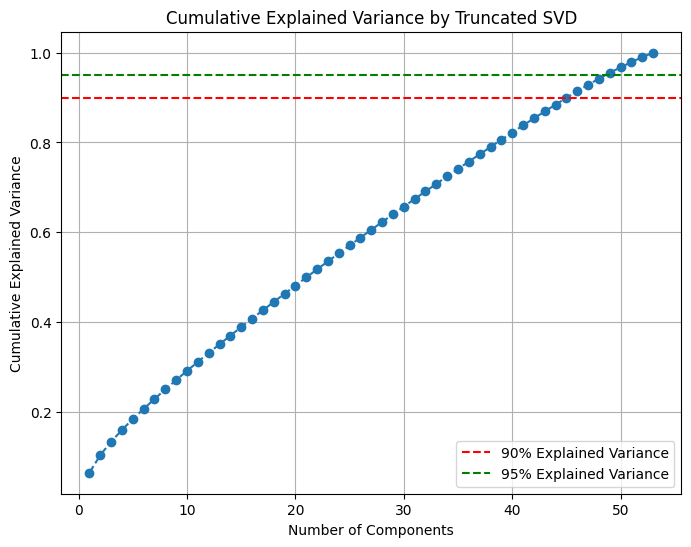

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假設 cumulative_variance 包含累積解釋方差比例
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance by Truncated SVD')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

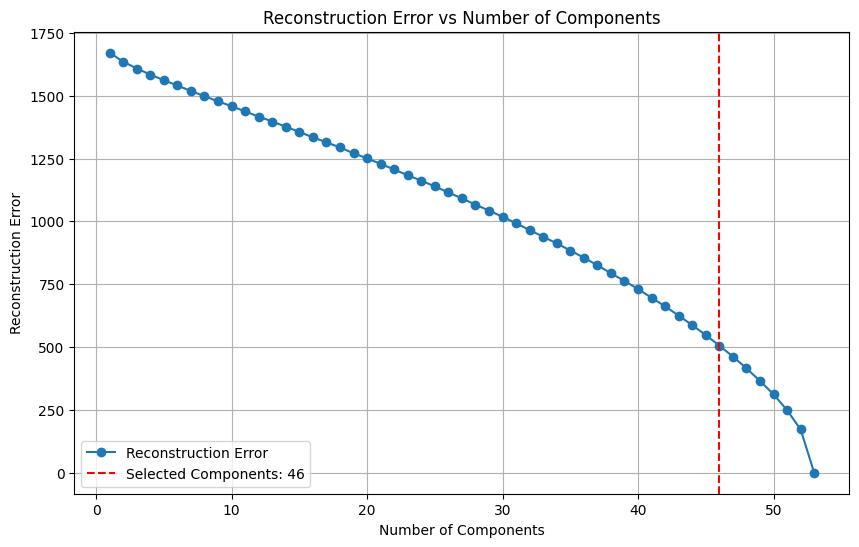

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 設定主成分數量範圍
components = range(1, 54, 1)  # 每隔 1 減少一次維度
reconstruction_errors = []

for n in components:
    # 初始化 Truncated SVD
    svd = TruncatedSVD(n_components=n, random_state=42)
    
    # 擬合並降維
    X_reduced = svd.fit_transform(X_scaled)
    
    # 重構資料
    X_reconstructed = svd.inverse_transform(X_reduced)
    
    # 計算重構誤差 (Frobenius norm)
    reconstruction_error = np.linalg.norm(X_scaled - X_reconstructed, ord='fro')
    reconstruction_errors.append(reconstruction_error)

# 繪製重構誤差圖
plt.figure(figsize=(10, 6))
plt.plot(components, reconstruction_errors, marker='o', label='Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Number of Components')
plt.axvline(x=46, color='r', linestyle='--', label='Selected Components: 46')
plt.legend()
plt.grid(True)
plt.show()


K=2, Silhouette Score: 0.2435
K=3, Silhouette Score: 0.1566
K=4, Silhouette Score: 0.1478
K=5, Silhouette Score: 0.1474
K=6, Silhouette Score: 0.1414
K=7, Silhouette Score: 0.0871
K=8, Silhouette Score: 0.0832
K=9, Silhouette Score: 0.1350
K=10, Silhouette Score: 0.1320
Optimal number of clusters (K): 2


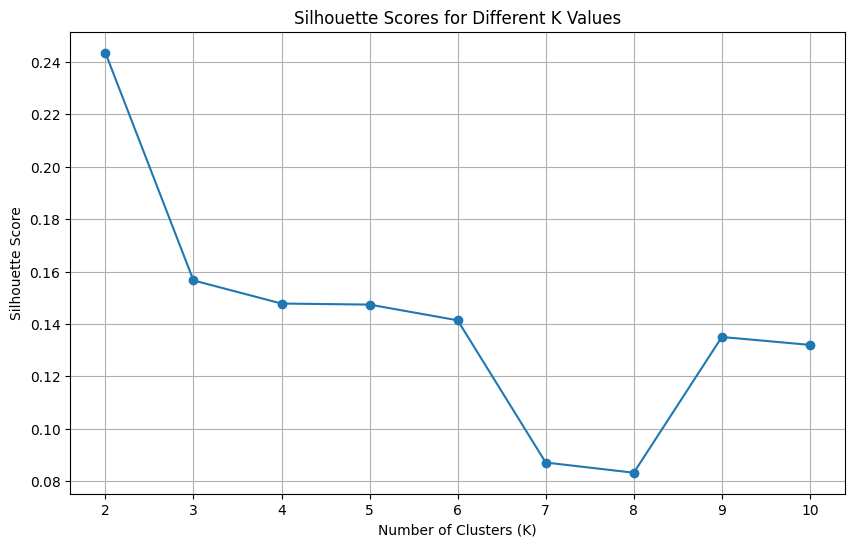

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 設定要嘗試的聚類數量範圍
k_values = range(2, 11)  # 通常嘗試從 2 到 10 群
silhouette_scores = []

# 使用不同的 K 值進行 KMeans 聚類並計算 silhouette 分數
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    labels = kmeans.labels_
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score: {score:.4f}")

# 找到最佳的 K 值
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (K): {optimal_k}")

# 使用最佳 K 值進行 KMeans 聚類
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_reduced)
final_labels = kmeans.labels_

# 視覺化 silhouette 分數
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 假設 X_reduced 是 TruncatedSVD 或其他降維後的資料
best_silhouette = -1
best_eps = None
best_min_samples = None
best_labels = None

min_samples_range = [5]
eps_range = np.arange(3.0, 7.5, 0.5)  # 測試不同的 eps 值範圍

# DBSCAN 超參數調整與最佳參數選擇
for min_samples in min_samples_range:
    for eps_value in eps_range:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
        labels = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters <= 1 or n_clusters >= len(X_reduced):
            continue
        
        if n_clusters > 1 and np.count_nonzero(labels != -1) > 1:
            sil_score = silhouette_score(X_reduced[labels != -1], labels[labels != -1])
            print(f"min_samples={min_samples}, eps={eps_value}, 群組數量={n_clusters}, Silhouette Score={sil_score}")
            
            if sil_score > best_silhouette:
                best_silhouette = sil_score
                best_eps = eps_value
                best_min_samples = min_samples
                best_labels = labels.copy()

print(f"\n最佳參數：min_samples={best_min_samples}, eps={best_eps}, Silhouette Score={best_silhouette}")

# 使用最佳參數進行最終聚類
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X_reduced)

# 可視化 DBSCAN 聚類結果
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        col = 'black'
        label_name = '噪音點'
    else:
        label_name = f'群組 {k}'
    
    xy = X_reduced[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, edgecolors='k', s=20)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

min_samples=5, eps=3.0, 群組數量=78, Silhouette Score=0.02278789134301858
min_samples=5, eps=3.5, 群組數量=56, Silhouette Score=0.0721473273042825
min_samples=5, eps=4.0, 群組數量=33, Silhouette Score=0.21039365073184424


: 